University of Michigan - ROB 101 Computational Linear Algebra

# [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) 

Newton's method is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function.

The idea is to start with an initial guess which is reasonably close to the true root, then to approximate the function by its tangent line using calculus, and finally to compute the x-intercept of this tangent line by elementary algebra.

The function $f$ is shown in blue and the tangent line is in red. We see that $x_{n + 1}$ is a better approximation than $x_n$ for the root $x$ of the function $f$.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Newton's method iterations" width="500">

The equation of the tangent line to the curve $y = f(x)$ at $x = x_n$ is
$$ y = f'(x_n) (x - x_n) + f(x_n),$$
where $f'$ denotes the derivative. 

The derivative of $f$ shows its *rate of change* with respect to $x$ (slope of the tangent line in the above equation). This is a concept you will learn in a calculus course. We assume no knowledge of calculus. Instead, we use an approximation method called *finite difference method* to replace the derivative term.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Tangent-calculus.svg" alt="derivative as tangent line" width="400">

### [Finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method)

Finite differences approximate the derivatives of "nicely behaved" functions via discretizations. Three types are commonly considered: forward, backward, and central finite differences. Here we will introduce central finite differences only, because it gives the best approximation of the derivative.
<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/Finite_difference_method.svg" alt="three finite difference methods" width="400">

Consider $f(x)$ and its derivative at $x=a$, i.e., $f'(a)$. A central finite difference approximation of the derivative is given by
$$f'(a) = \frac{f(a+h) - f(a-h)}{2h}.$$

The finite difference method relies on discretizing a function on a grid.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4c/Finite_Differences.svg" alt="finite difference method" width="200">

### Back to Newton's method
We now replace the derivative in $y = f'(x_n) (x - x_n) + f(x_n)$ with its finite difference approximation. To find a root of $f(x)$, we set $y=0$.

\begin{align*}
    y = \frac{f(x_n+h) - f(x_n-h)}{2h} (x - x_n) + f(x_n) = 0,
\end{align*}

and 
\begin{align*}
    x = x_n - 2h \cdot \frac{f(x_n)}{f(x_n+h) - f(x_n-h)}.
\end{align*}

To use this last formula iteratively, we use the following succession rule.

\begin{align*}
    \boxed{x_{n+1} = x_n - 2h \cdot \frac{f(x_n)}{f(x_n+h) - f(x_n-h)}}.
\end{align*}

Starting with an *initial guess*, $x_0$, that is near the solution, we can iterate to find the root. 

**Remark:** It is important to choose a sufficiently small $h$ to reduce the *discretization error*.

### Our final result

![48uw8q.jpg](https://i.postimg.cc/KcVtZj6y/48uw8q.jpg)

### Example 1

Consider $f(x) = (x-1)^2 - 4$. We know $f(3) = 0$; hence $x=3$ is a *root* of $f(x)$. We pick $x_0 = 2$ as the initial guess (try $x_0 = 0$ to find the other root!).


In [1]:
function f(x) # f(x) = (x-1)^2 - 4
    return (x-1)^2 - 4
end

x0 = 2; h = 0.01/2; # initial guess, x0, and step size, h.
delta = 1e-9; # set a convergence threshold
# set a max iteration so we don't get stuck in the loop forever!
MAX_ITER = 100; 
N = 1; # counter for iteration
# let the fun begin!
while N < MAX_ITER
    # evaluate f at current guess, x0, and x0 + h.
    f0 = f(x0-h); f1 = f(x0); f2 = f(x0 + h); df = f2 - f0;
    if abs(df) < delta
        println("Newton's method did not converge; derivative is near zero.")
        break
    else
        dx = -2*h * (f1 / (f2 - f0));
    end
    if abs(dx) < delta
        println("Converged at iteration: N = ", N)
        break
    else
        x0 = x0 + dx;
    end
    N += 1;
end

print("root: ", x0, "\n")
print("f(root): ", f(x0), "\n")

Converged at iteration: N = 6
root: 3.000000000000002
f(root): 8.881784197001252e-15


### Example 2

Now consider $f(x) = \cos(\exp(-0.1 x) - \frac{\pi}{3})$. We pick $x_0 = 1$ as our initial guess.

![bisection-example2.png](https://i.postimg.cc/Xvc472ww/bisection-example2.png)

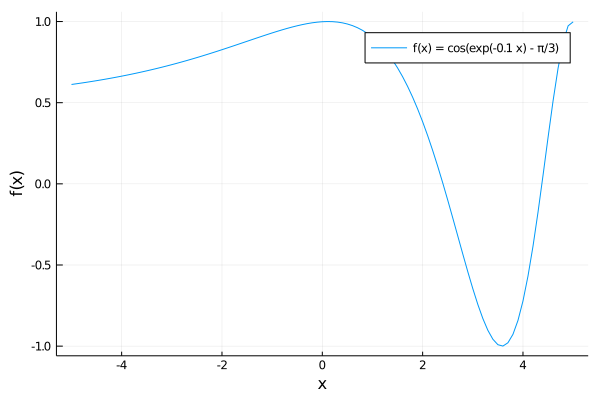

In [2]:
using Plots
backend()
x = LinRange(-5,5,101)
y = cos.(exp.(0.4*x) .- π/3)
plot(x, y, xlabel="x", ylabel="f(x)", label="f(x) = cos(exp(-0.1 x) - π/3)")

In [3]:
function f(x) # f(x) = cos(exp(0.4*x) - π/3)
    return cos.(exp.(0.4*x) .- π/3)
end

x0 = 2; h = 0.01/2; # initial guess, x0, and step size, h.
delta = 1e-9; # set a convergence threshold
# set a max iteration so we don't get stuck in the loop forever!
MAX_ITER = 100; 
N = 1; # counter for iteration
# let the fun begin!
while N < MAX_ITER
    # evaluate f at current guess, x0, and x0 + h.
    f0 = f(x0-h); f1 = f(x0); f2 = f(x0 + h); df = f2 - f0;
    if abs(df) < delta
        println("Newton's method did not converge; derivative is near zero.")
        break
    else
        dx = -2 * h * (f1 / (f2 - f0));
    end
    if abs(dx) < delta
        println("Converged at iteration: N = ", N)
        break
    else
        x0 = x0 + dx;
    end
    N += 1;
end

print("root: ", x0, "\n")
print("f(root): ", f(x0), "\n")

Converged at iteration: N = 5
root: 2.4060208226383306
f(root): 2.964907799148742e-13


**Remark:** Notice that the number of iterations required by Newton's method to converge (if it does) is significantly lower. Mathematically speaking, the convergence rate of Newton's method is *quadratic* near the solution, whereas the bisection method has a *linear* convergence rate.